## Simple linear regression model
Using Tensorflow and the included Keras library, Numpy for array handling - a local test of basic model performance on your device in a Jupyter Python3 kernel! Simple linear regression is a statistical model for predicting unknown values given known values across a single known variable.

In [ ]:
!pip3 install tensorflow numpy 

If you don't have these libraries, you'll want to run the above code snippet!

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Now we'll setup our model as a linearly ***Sequential*** neural network model with a single layer of neurons/nodes between our inputs and outputs. Notice that the layer is a ***Dense*** layer, which means every incoming node is connected to every node in the output layer. Here's an example of a Dense layer with all nodes connected.

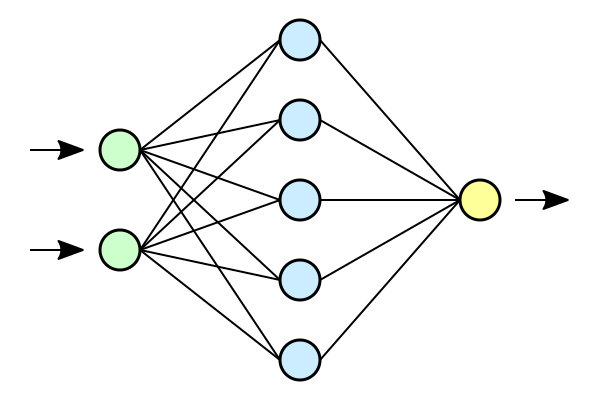

_Illustration credit: https://www.analyticsvidhya.com/blog/2021/06/linear-regression-using-neural-networks/_

In our case, we have a single input and output, with our data coming from a set of data points taken from _y = 2x - 1_. Good response explaining units, input shape, and other important aspects of Keras layers in our model: [StackOverflow - Keras input explanation]("https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc")

In [ ]:
layer1 = Dense(units=1, input_shape=[1]) # declare the shape and nature of the single layer
model = Sequential([layer1]) # use the new layer to create our sequential model

Next we'll compile our model, using ***stochastic gradient descent*** - 'sgd' - (a mathy thing, check this out (7:23 mins): [Optimizers - EXPLAINED! - YouTube]("https://youtu.be/mdKjMPmcWjY")) for _optimization_ (this is how the model neurons learn to adjust their weights and bias, or _train_, starting at a random point and improving during each training cycle or _epoch_), and an error/loss/cost function of ***mean squared error*** - 'mean_squared_error' - which is essentially an average across the error rates for each neuron as it tries to optimize itself, with sensitivity towards outliers. See this friendly article on loss functions and common examples, including MSE: [Loss Functions in Neural Networks]("https://www.theaidream.com/post/loss-functions-in-neural-networks")

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

Now that our model is setup, let's declare the arrays of input data and the expected outputs for each case of x. This is a very simple straight line when plotted, but inferring this is not simple for a machine without machine learning models like this one.

In [ ]:
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0], dtype=float)

We're ready to train! This code is going to scroll in your notebook for a moment, then Jupyter will condense. You'll see each cycle - ***epoch*** - as the model is training, starting at a random point, and then using the loss function to measure and adjust each neuron much the way a brain might adjust as it learns a novel task. Notice the loss function change. If you've passed a good data set (those xs/inputs and ys/outputs above) that is distributed in a quickly inferable way, the model will perform well with the loss function dropping quickly per epoch. Using the original values you'll see the loss function results get incredibly small - this means our model is doing pretty good with its predictions! Try upping the epoch count to train longer, and try modifying, adding, or shortening the inputs (just make sure you calculate the correct output for the ys or your model will be attempting an impossible task! Currently we're predicting y = 2x - 1, but feel free to completely change the dataset of inputs and expected outputs!)

In [ ]:
model.fit(xs,ys,epochs=500)

Let's test this model out now. We'll pass an unseen x value to the model, and hope for an answer that is close.

In [ ]:
print(model.predict(x=np.array([200.0])))   # Y = 2(200.0) - 1 = 399, we hope!

Last but not least, let's measure our model by looking at the developed weights. Does this look good enough for your use case?

In [ ]:
print("Our Dense layer's learned weights: {}".format(layer1.get_weights()))

We got really close to a weight of 2 and a bias of -1 with just 500 epochs, starting at a random point with no knowledge of the equation! 